# loan_data

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Ignoring the warnings

import warnings
warnings.filterwarnings("ignore")

import pandasql as psql

In [2]:
# Load the loans data

loans = pd.read_csv(r"D:\iiit notes\Programming\AI\Internship practice\46 season 22-jul-2021\loan_data.csv", header=0)
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
# Change the name of the variable

loans = loans.rename(columns = {'not.fully.paid' : 'NFPaid'}, inplace = False)
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFPaid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
# Identify the category variables

cat_cols = ['purpose']

# Convert the catagory variable into dummy variables

loans = pd.get_dummies(loans,columns=cat_cols)
loans=pd.DataFrame(loans)
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFPaid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  NFPaid                      9578 non-null   int64  
 13  purpose_all_other           9578 

In [6]:
loans['NFPaid'].value_counts()

0    8045
1    1533
Name: NFPaid, dtype: int64

In [7]:
# Identify the dependent and Target variables

IndepVar = []
for col in loans.columns:
    if col != 'NFPaid':
        IndepVar.append(col)

TargetVar = 'NFPaid'

x = loans[IndepVar]
y = loans[TargetVar]

In [8]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 6)
x_test_F1 = x_test.copy()

In [9]:
# Identify variables which are fit for scaling

cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']

# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

# SVM Algorithm

In [10]:
# Training the SVM algorithm

from sklearn.svm import SVC

modelSVMGaussian = SVC(kernel='rbf', random_state = None, class_weight=None, probability=True)
modelSVMGaussian.fit(x_train, y_train)

# Predicting the values

y_pred = modelSVMGaussian.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

Confusion matrix : 
 [[   1  460]
 [   1 2412]]
Outcome Values : 
 1 460 1 2412
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.00      0.00       461
           0       0.84      1.00      0.91      2413

    accuracy                           0.84      2874
   macro avg       0.67      0.50      0.46      2874
weighted avg       0.79      0.84      0.77      2874

Accuracy : 84.0 %
Precision : 50.0 %
Recall : 0.2 %
F1 Score : 0.004
Balanced Accuracy : 50.1 %
MCC 0.024
roc_auc_score: 0.501


# Random Forest Algorithm

In [11]:
# Build Random Forest Classification model and train model using the training dataset

from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=2, min_samples_split=2, min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                                 min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, 
                                 n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                                 ccp_alpha=0.0, max_samples=None)

modelRF = modelRF.fit(x_train, y_train)

# Predict the model with the test data set

y1_pred = modelRF.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y1_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y1_pred), 3))

Confusion matrix : 
 [[   0  461]
 [   0 2413]]
Outcome Values : 
 0 461 0 2413
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       461
           0       0.84      1.00      0.91      2413

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.77      2874

Accuracy : 84.0 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Balanced Accuracy : 50.0 %
MCC nan
roc_auc_score: 0.5


# Logistic Regression Algorithm

In [12]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                            intercept_scaling=1, max_iter=100, multi_class='auto',
                            n_jobs=None, penalty='l2', random_state=None,
                            solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

modelLR = modelLR.fit(x_train,y_train)

# Predict the model with test data set

y2_pred = modelLR.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y2_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y2_pred), 3))

Confusion matrix : 
 [[   7  454]
 [   8 2405]]
Outcome Values : 
 7 454 8 2405
Classification report : 
               precision    recall  f1-score   support

           1       0.47      0.02      0.03       461
           0       0.84      1.00      0.91      2413

    accuracy                           0.84      2874
   macro avg       0.65      0.51      0.47      2874
weighted avg       0.78      0.84      0.77      2874

Accuracy : 83.9 %
Precision : 46.7 %
Recall : 1.5 %
F1 Score : 0.029
Balanced Accuracy : 50.6 %
MCC 0.06
roc_auc_score: 0.506


# Decision Tree Algorithm

In [13]:
# To build the decision tree model with Over sampling

from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                                max_depth=None, max_features=None, max_leaf_nodes=None,
                                min_impurity_decrease=0.0, min_impurity_split=None,
                                min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
                                random_state=None, splitter='best')

modelDT = modelDT.fit(x_train,y_train)

# Predict with test data

y3_pred = modelDT.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y3_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y3_pred), 3))

Confusion matrix : 
 [[ 127  334]
 [ 448 1965]]
Outcome Values : 
 127 334 448 1965
Classification report : 
               precision    recall  f1-score   support

           1       0.22      0.28      0.25       461
           0       0.85      0.81      0.83      2413

    accuracy                           0.73      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.75      0.73      0.74      2874

Accuracy : 72.8 %
Precision : 22.1 %
Recall : 27.5 %
F1 Score : 0.245
Balanced Accuracy : 54.4 %
MCC 0.082
roc_auc_score: 0.545


# KNN Algorithm

In [14]:
# Build the algorithm with KNN

from sklearn import neighbors

modelKNN = neighbors.KNeighborsClassifier(n_neighbors=5,weights='uniform', algorithm='auto', leaf_size=30, p=2, 
                                          metric='minkowski', metric_params=None, n_jobs=None)
modelKNN.fit(x_train, y_train)

# Predict the model with test dataset

y4_pred = modelKNN.predict(x_test)


from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y4_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y4_pred), 3))

Confusion matrix : 
 [[  40  421]
 [  92 2321]]
Outcome Values : 
 40 421 92 2321
Classification report : 
               precision    recall  f1-score   support

           1       0.30      0.09      0.13       461
           0       0.85      0.96      0.90      2413

    accuracy                           0.82      2874
   macro avg       0.57      0.52      0.52      2874
weighted avg       0.76      0.82      0.78      2874

Accuracy : 82.2 %
Precision : 30.3 %
Recall : 8.7 %
F1 Score : 0.135
Balanced Accuracy : 52.4 %
MCC 0.085
roc_auc_score: 0.524


# Naive Bayes Algorithm

In [15]:
# To build the 'Naive Bayes' model with random sampling 
from sklearn.naive_bayes import GaussianNB 

modelGNB = GaussianNB(priors=None, var_smoothing=1e-09) 
modelGNB = modelGNB.fit(x_train,y_train) 

# Predict the model with test data set 

y5_pred = modelGNB.predict(x_test) 


from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y5_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y5_pred), 3))

Confusion matrix : 
 [[ 164  297]
 [ 351 2062]]
Outcome Values : 
 164 297 351 2062
Classification report : 
               precision    recall  f1-score   support

           1       0.32      0.36      0.34       461
           0       0.87      0.85      0.86      2413

    accuracy                           0.77      2874
   macro avg       0.60      0.61      0.60      2874
weighted avg       0.78      0.77      0.78      2874

Accuracy : 77.5 %
Precision : 31.8 %
Recall : 35.6 %
F1 Score : 0.336
Balanced Accuracy : 60.5 %
MCC 0.201
roc_auc_score: 0.605


# Voting Classifier

In [16]:
# 'VotingClassifier' module in sklearn

from sklearn.ensemble import VotingClassifier

Votemodel = VotingClassifier(estimators = [('lr', modelLR), ('dt', modelDT), ('gnb', modelGNB), ('knn', modelKNN)], 
                             voting='hard', weights=[0.1, 0.2, 0.6, 0.1], n_jobs=None, flatten_transform=True, verbose=False)
Votemodel.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('gnb', GaussianNB()),
                             ('knn', KNeighborsClassifier())],
                 weights=[0.1, 0.2, 0.6, 0.1])

In [17]:
# Predict the model with test data set 

y99_pred = Votemodel.predict(x_test) 

# Display confusion matrix and classifiction report


from sklearn.metrics import classification_report, confusion_matrix

# actual values

actual = y_test

# predicted values
predicted = y99_pred

# confusion matrix

matrix = confusion_matrix(actual, predicted, labels=[1, 0], sample_weight=None, normalize=None,)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp,fn, fp, tn = confusion_matrix(actual, predicted, labels=[1,0]).reshape(-1)

print('Outcome Values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n', matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3) 

specificity = round(tn/(tn+fp), 3)

accuracy = round((tp+tn)/(tp+fp+tn+fn), 3)
balanced_accuracy = round((sensitivity+specificity)/2, 3)
precision = round(tp/(tp+fp), 3)
f1Score = round((2*tp/(2*tp + fp +fn)), 3);

# Mathews Correlatin coefficient (MCC). Range of values of MCC lie between -1 to +1
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

m = (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)

MCC = round(((tp* tn) - (fp * fn)) / sqrt(m), 3)

print('Accuracy :', round(accuracy*100, 2), '%')
print('Precision :', round(precision*100, 2), '%')
print('Recall :', round(sensitivity*100, 2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2), '%')
print('MCC', MCC)

from sklearn.metrics import roc_curve, roc_auc_score

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y99_pred), 3))

Confusion matrix : 
 [[ 164  297]
 [ 351 2062]]
Outcome Values : 
 164 297 351 2062
Classification report : 
               precision    recall  f1-score   support

           1       0.32      0.36      0.34       461
           0       0.87      0.85      0.86      2413

    accuracy                           0.77      2874
   macro avg       0.60      0.61      0.60      2874
weighted avg       0.78      0.77      0.78      2874

Accuracy : 77.5 %
Precision : 31.8 %
Recall : 35.6 %
F1 Score : 0.336
Balanced Accuracy : 60.5 %
MCC 0.201
roc_auc_score: 0.605


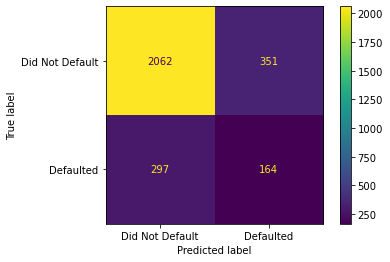

In [18]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(Votemodel, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])

In [19]:
Results = pd.DataFrame({'NFPaid': y_test, 'NFPaid_Pred': y99_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = x_test_F1.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(10)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,...,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,NFPaid,NFPaid_Pred
2717,1,0.1221,499.73,11.546002,8.57,772,4109.958333,11700,42.5,0,...,0,0,0,0,0,0,0,1,0,0
5353,1,0.1461,379.23,10.714418,12.00,672,8639.958333,9311,40.5,0,...,0,0,0,1,0,0,0,0,0,0
3916,1,0.1221,116.61,10.596635,8.28,687,5249.958333,3900,43.7,0,...,0,0,1,0,0,0,0,0,0,0
2690,1,0.1632,247.20,10.915088,3.99,662,2189.958333,4747,93.1,1,...,0,0,0,1,0,0,0,0,0,0
730,1,0.0800,109.68,10.790597,0.62,742,7170.041667,308,17.1,4,...,0,1,0,0,0,0,0,0,0,0
4150,1,0.1322,365.05,10.950807,19.03,692,3660.000000,31861,76.0,1,...,0,0,1,0,0,0,0,0,0,0
8418,0,0.1261,723.74,11.736069,16.94,687,4020.000000,167006,53.5,3,...,0,1,0,0,0,0,0,0,1,1
8763,0,0.1412,140.37,11.184421,1.57,652,1649.958333,3842,27.4,3,...,0,1,0,0,0,0,0,0,0,0
5065,1,0.1357,163.05,11.097410,6.29,697,3539.958333,500,25.0,0,...,0,1,0,0,0,0,0,0,0,0
3280,1,0.1316,236.40,10.505068,22.32,702,4859.958333,15394,95.8,1,...,0,1,0,0,0,0,0,0,0,0
